In [ ]:
import pandas as pd
import numpy as np
import warnings
import os

from geopy.geocoders import Nominatim


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
# 1. **Magnitude**: Likely to be a strong predictor for the occurrence of a tsunami.
# 2. **Depth**: The depth of the earthquake can also be crucial; shallower earthquakes are more likely to trigger tsunamis.
# 3. **Latitude and Longitude**: These can be important if there are certain geographic regions that are more prone to tsunamis.
# 4. **Dmin**: Minimum distance to the station; could indicate how localized or widespread the seismic activity is.
# 5. **Gap**: Could help in indicating the reliability of the seismic reading.
# 6. **Sig**: An overall 'significance' score that takes into account various factors could be a good predictor.
# 7. **NST**: Number of stations that reported could be indicative of the event's magnitude.

# You might not want to include:

# 1. **CDI and MMI**: These are measures of the impact of the earthquake, which could be seen as outcomes rather than predictors.
# 2. **Year and Month**: Unless you have a reason to suspect seasonal or annual trends, these may not be helpful.

In [ ]:
df = pd.read_csv('earthquake_1995-2023_fixed.csv')

In [ ]:
# from opencage.geocoder import OpenCageGeocode
# df = pd.read_csv('earthquake_1995-2023.csv')
# ## Initialize the geocoder
# key = '69dd9def50244697950b7aed4b0ddfc0'  # Your API key
# geocoder = OpenCageGeocode(key)

# def get_location_by_coordinates_opencage(lat, lon):
#     """Get location details from latitude and longitude."""
#     results = geocoder.reverse_geocode(lat, lon)

#     print("API Results:", results)

#     country = ''
#     continent = ''
#     body_of_water = ''

#     if len(results) > 0:
#         components = results[0]['components']
#         country = components.get('country', '')
#         continent = components.get('continent', '')
#         body_of_water = components.get('body_of_water', '')

#         print(f'lat: {lat}, lon: {lon}')
#         print(f'country: {country}')
#         print(f'continent: {continent}')
#         print(f'body_of_water: {body_of_water}')
#         print("\n")

#     return country, continent if continent else body_of_water

# # Update the missing values
# print ('reached here')
# for i, row in df.iterrows():
#     if pd.isna(row['country']) or pd.isna(row['continent']):
#         print(f"Row {i} - Update Needed: Country: {row['country']}, Continent: {row['continent']}")
#         lat, lon = row['latitude'], row['longitude']
#         country, geographic_info = get_location_by_coordinates_opencage(lat, lon)
#         df.at[i, 'country'] = country
#         df.at[i, 'continent'] = geographic_info  # Changed to 'continent' to make it consistent

#         #print updated row
#         print(f"Updated Row {i}:")
#         print(df.loc[i])
#         print("="*40)
# # Save the updated DataFrame
# df.to_csv('earthquake_1995-2023_fixed.csv', index=False)

In [ ]:
df.head()

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,"Sola, Vanuatu",Oceania,Vanuatu
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,"Intipucá, El Salvador",NaN,NaN
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,"Loncopué, Argentina",South America,Argentina
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,"Sand Point, Alaska",North Pacific,NaN
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,Alaska Peninsula,North Pacific,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1000 non-null   object 
 1   magnitude  1000 non-null   float64
 2   date_time  1000 non-null   object 
 3   cdi        1000 non-null   int64  
 4   mmi        1000 non-null   int64  
 5   alert      449 non-null    object 
 6   tsunami    1000 non-null   int64  
 7   sig        1000 non-null   int64  
 8   net        1000 non-null   object 
 9   nst        1000 non-null   int64  
 10  dmin       1000 non-null   float64
 11  gap        1000 non-null   float64
 12  magType    1000 non-null   object 
 13  depth      1000 non-null   float64
 14  latitude   1000 non-null   float64
 15  longitude  1000 non-null   float64
 16  location   994 non-null    object 
 17  continent  967 non-null    object 
 18  country    647 non-null    object 
dtypes: float64(6), int64(5), object(8)
memory usage: 

In [ ]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,6.940150,3.605000,6.02700,0.325000,847.915000,193.918000,1.125174,20.926290,74.612541,4.315554,51.486576
std,0.438148,3.328972,1.43399,0.468609,301.802632,239.045858,2.073164,24.415895,130.812590,26.633320,117.478302
min,6.500000,0.000000,1.00000,0.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000
25%,6.600000,0.000000,5.00000,0.000000,691.000000,0.000000,0.000000,0.000000,16.000000,-13.518500,-71.694450
50%,6.800000,4.000000,6.00000,0.000000,744.000000,0.000000,0.000000,18.000000,29.000000,-2.443500,107.791000
75%,7.100000,7.000000,7.00000,1.000000,874.250000,403.000000,1.549250,27.000000,55.000000,25.167250,148.364750
max,9.100000,9.000000,10.00000,1.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000


In [ ]:
df.isnull().sum()/df.shape[0]*100

title         0.0
magnitude     0.0
date_time     0.0
cdi           0.0
mmi           0.0
alert        55.1
tsunami       0.0
sig           0.0
net           0.0
nst           0.0
dmin          0.0
gap           0.0
magType       0.0
depth         0.0
latitude      0.0
longitude     0.0
location      0.6
continent     3.3
country      35.3
dtype: float64

# Dropping Unnecessary Data

In [ ]:
## Drop unecessary columns and convert time into year and month.
df.drop(['title','alert','location'],axis=1,inplace=True)
df['date_time']=pd.to_datetime(df['date_time'])
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)

In [ ]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Oceania,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,South America,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,North Pacific,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,North Pacific,NaN,2023,7


In [ ]:
df.isnull().sum()

magnitude      0
cdi            0
mmi            0
tsunami        0
sig            0
net            0
nst            0
dmin           0
gap            0
magType        0
depth          0
latitude       0
longitude      0
continent     33
country      353
Year           0
Month          0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1000 non-null   float64
 1   cdi        1000 non-null   int64  
 2   mmi        1000 non-null   int64  
 3   tsunami    1000 non-null   int64  
 4   sig        1000 non-null   int64  
 5   net        1000 non-null   object 
 6   nst        1000 non-null   int64  
 7   dmin       1000 non-null   float64
 8   gap        1000 non-null   float64
 9   magType    1000 non-null   object 
 10  depth      1000 non-null   float64
 11  latitude   1000 non-null   float64
 12  longitude  1000 non-null   float64
 13  continent  967 non-null    object 
 14  country    647 non-null    object 
 15  Year       1000 non-null   int64  
 16  Month      1000 non-null   int64  
dtypes: float64(6), int64(7), object(4)
memory usage: 132.9+ KB


# EDA (need further analysis to new dataset, will be compelete by zihan on saturady

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: xlabel='magnitude', ylabel='count'>

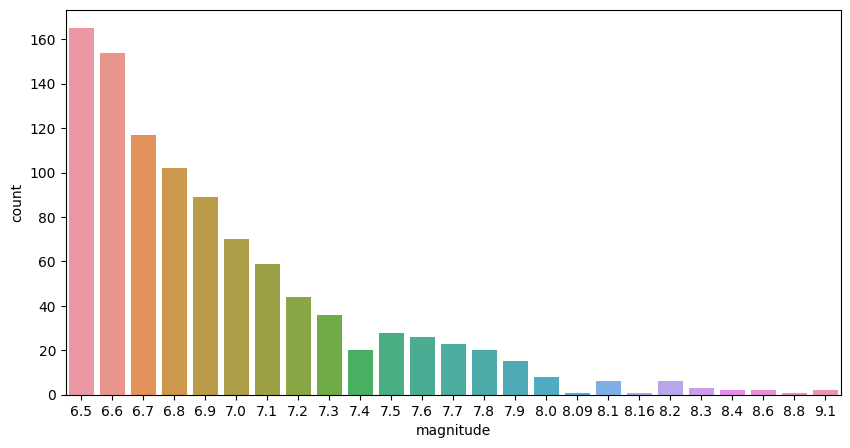

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)
#Most earthquakes tend to be around 6.5 to 6.7 on the scale resulted from kaggle.

Text(0.5, 1.0, 'TOP 15 EARTHQUAKE PRONE COUNTRIES')

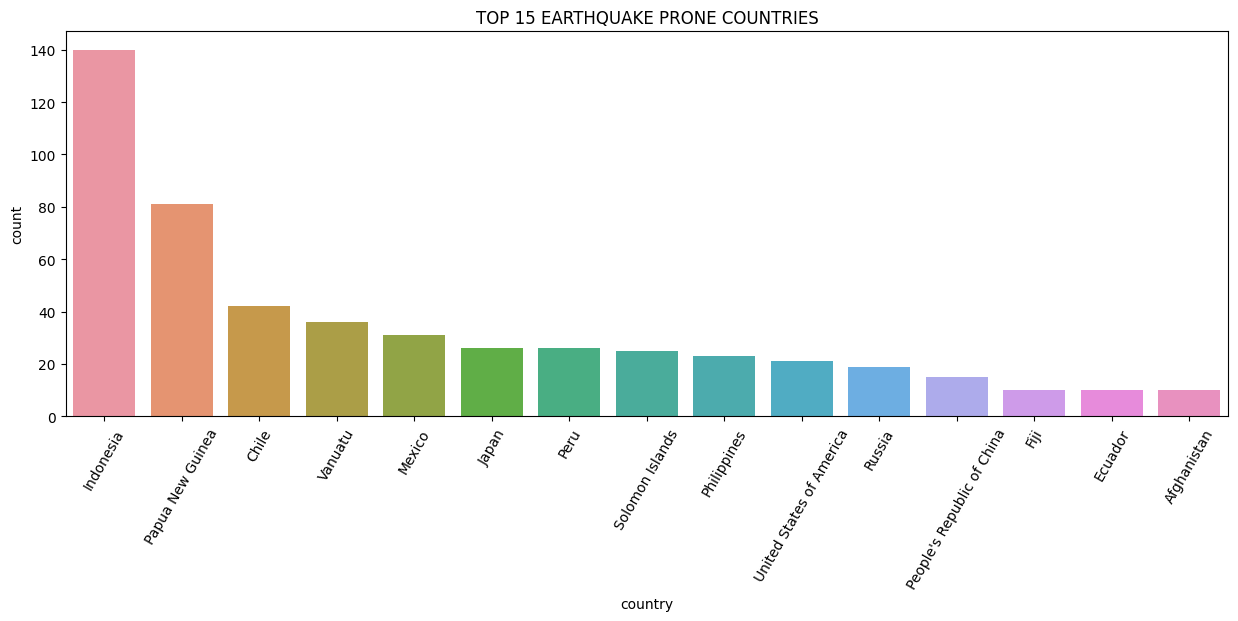

In [ ]:
o=df['country'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes.

Text(0.5, 1.0, 'TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')

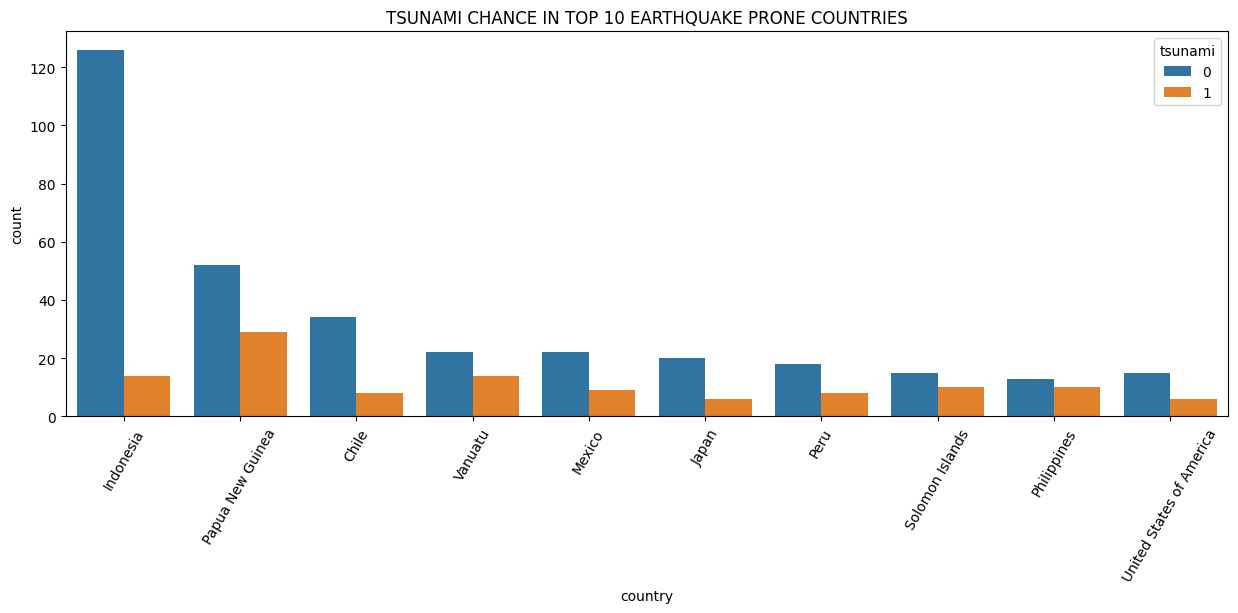

In [ ]:
o=df['country'].value_counts().head(10).index
plt.figure(figsize=(15,5))
sns.countplot(x='country',data=df,order=o,hue='tsunami')
plt.xticks(rotation=60)
plt.title('TSUNAMI CHANCE IN TOP 10 EARTHQUAKE PRONE COUNTRIES')
#Indonesia has the highest number of earthquakes worldwide, but Papua New Guinea and Philippines  has a very high risk of tsunamis following an earthquake.

<Axes: xlabel='sig', ylabel='magnitude'>

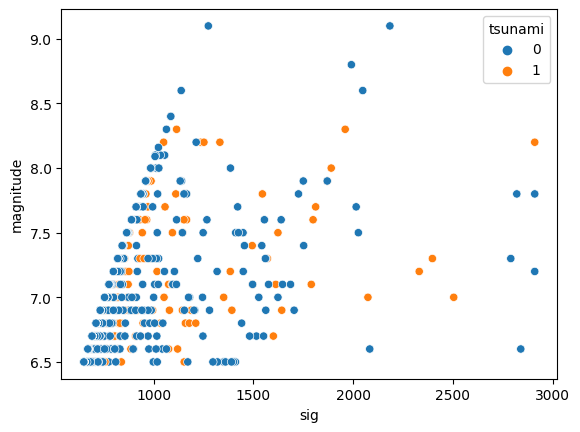

In [ ]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='tsunami')
#the higher the magnitude higher the chance of tsunami

Text(0.5, 1.0, 'EARTHQUICK DATA CONTRIBUTOR')

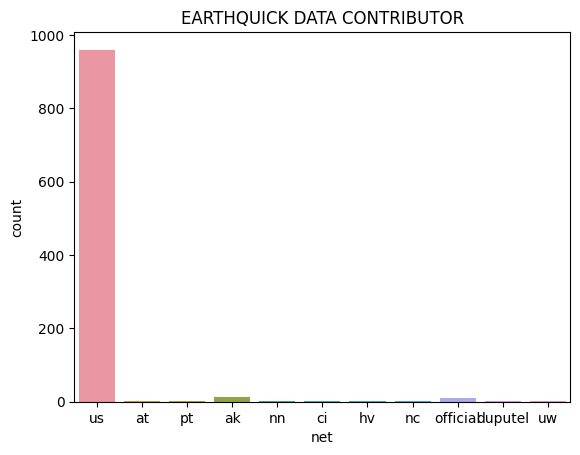

In [ ]:
sns.countplot(x='net',data=df)
plt.title('EARTHQUICK DATA CONTRIBUTOR')
#The US is a major contributor of earthquake data

Text(0.5, 1.0, 'Tsunami Distribution')

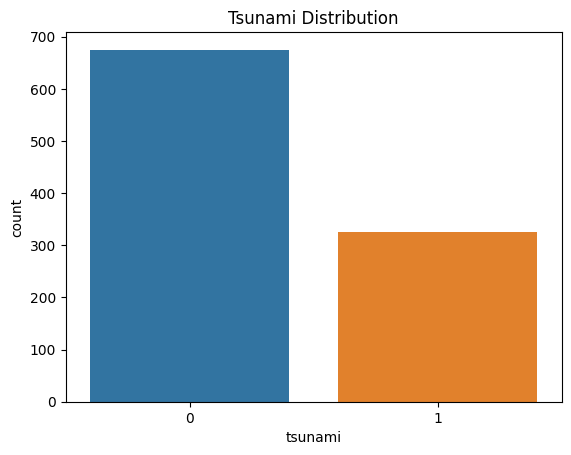

In [ ]:
sns.countplot(x='tsunami',data=df)
plt.title('Tsunami Distribution')

<Axes: xlabel='Year', ylabel='count'>

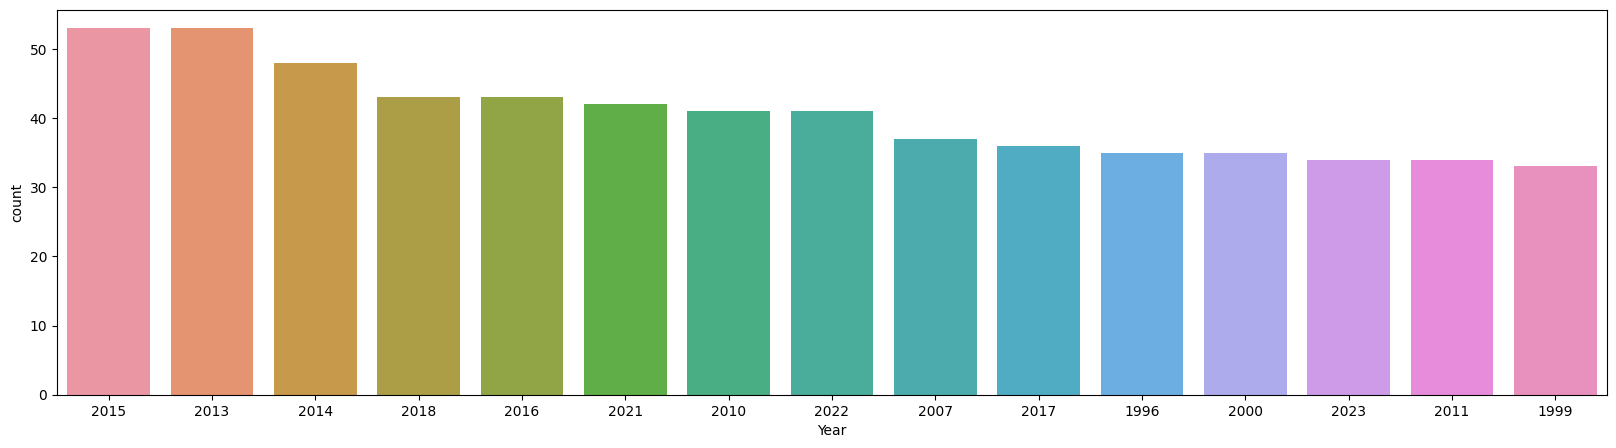

In [ ]:
plt.figure(figsize=(20,5))
o=df['Year'].value_counts().head(15).index
sns.countplot(x='Year',data=df,order=o)
#In 2015 and 2013, the world experienced the highest number of earthquakes.

Text(0.5, 1.0, 'NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')

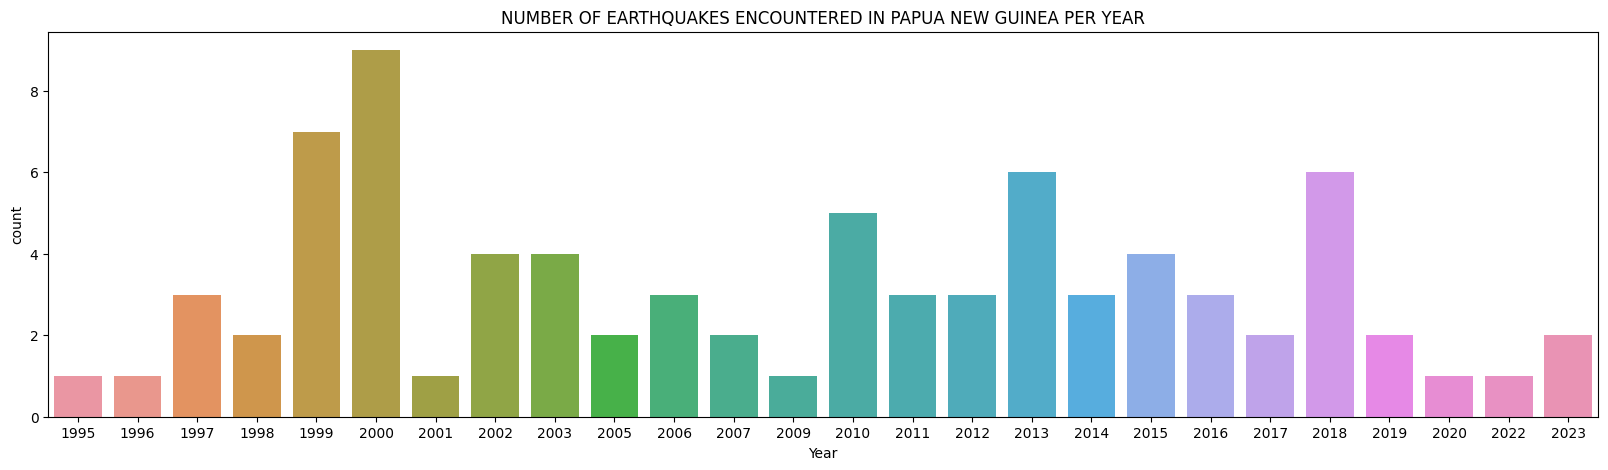

In [ ]:
# Do this with japan as well
Papua=df[df['country']=='Papua New Guinea']
plt.figure(figsize=(20,5))
sns.countplot(x='Year',data=Papua)
plt.title('NUMBER OF EARTHQUAKES ENCOUNTERED IN PAPUA NEW GUINEA PER YEAR')
#Papua New Guinea experiences at least one earthquake per year

# Feature Engineering Continue

In [ ]:
df.head()

,magnitude,cdi,mmi,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,continent,country,Year,Month
0,6.5,7,4,0,657,us,114,7.177000,25.0,mww,192.955,-13.8814,167.1580,Oceania,Vanuatu,2023,8
1,6.5,8,6,0,775,us,92,0.679000,40.0,mww,69.727,12.8140,-88.1265,NaN,NaN,2023,7
2,6.6,7,5,0,899,us,70,1.634000,28.0,mww,171.371,-38.1911,-70.3731,South America,Argentina,2023,7
3,7.2,6,6,1,860,us,173,0.907000,36.0,mww,32.571,54.3844,-160.6990,North Pacific,NaN,2023,7
4,7.3,0,5,1,820,at,79,0.879451,172.8,Mi,21.000,54.4900,-160.7960,North Pacific,NaN,2023,7


In [ ]:
## we will drop the year and month, since the tsunami is not a seasonale staff. It can occurs anytime.
df.drop(['Year', 'Month'], axis=1,inplace=True)#we have latitude and longitude

In [ ]:
obj=df.select_dtypes(include=['object'])
obj

,net,magType,continent,country
0,us,mww,Oceania,Vanuatu
1,us,mww,NaN,NaN
2,us,mww,South America,Argentina
3,us,mww,North Pacific,NaN
4,at,Mi,North Pacific,NaN
...,...,...,...,...
995,us,mwb,Asia,Russia
996,us,mw,South Pacific,NaN
997,us,mw,Asia,Indonesia
998,us,mw,Europe,Greece


In [ ]:
obj.nunique()

net          11
magType       9
continent    31
country      55
dtype: int64

In [ ]:
## This time we kept the magtype, continent and country.
## Explaination will be provided later by zihan
obj.drop('net',axis=1,inplace=True)
df.drop(['net','country', 'continent','magType'],axis=1,inplace=True)

In [ ]:
## convert categorical variables to numerical labels since tree model need numercial values
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl=obj.apply(lr.fit_transform)
df=pd.concat([df,obj_lbl],axis=1)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,magType,continent,country
0,6.5,7,4,0,657,114,7.177000,25.0,192.955,-13.8814,167.1580,8,21,53
1,6.5,8,6,0,775,92,0.679000,40.0,69.727,12.8140,-88.1265,8,31,55
2,6.6,7,5,0,899,70,1.634000,28.0,171.371,-38.1911,-70.3731,8,28,2
3,7.2,6,6,1,860,173,0.907000,36.0,32.571,54.3844,-160.6990,8,20,55
4,7.3,0,5,1,820,79,0.879451,172.8,21.000,54.4900,-160.7960,0,20,55


           magnitude       cdi       mmi   tsunami       sig       nst  \
magnitude   1.000000       NaN       NaN       NaN  0.512358       NaN   
cdi              NaN  1.000000       NaN       NaN  0.479911       NaN   
mmi              NaN       NaN  1.000000       NaN  0.398149       NaN   
tsunami          NaN       NaN       NaN  1.000000       NaN -0.426026   
sig         0.512358  0.479911  0.398149       NaN  1.000000       NaN   
nst              NaN       NaN       NaN -0.426026       NaN  1.000000   
dmin             NaN       NaN -0.307331  0.443179       NaN -0.402445   
gap              NaN       NaN       NaN       NaN       NaN       NaN   
depth            NaN       NaN -0.517002       NaN       NaN       NaN   
latitude         NaN       NaN       NaN       NaN       NaN       NaN   
longitude        NaN       NaN       NaN       NaN       NaN       NaN   
magType          NaN  0.364859       NaN  0.372177       NaN       NaN   
continent        NaN       NaN       N

<Axes: >

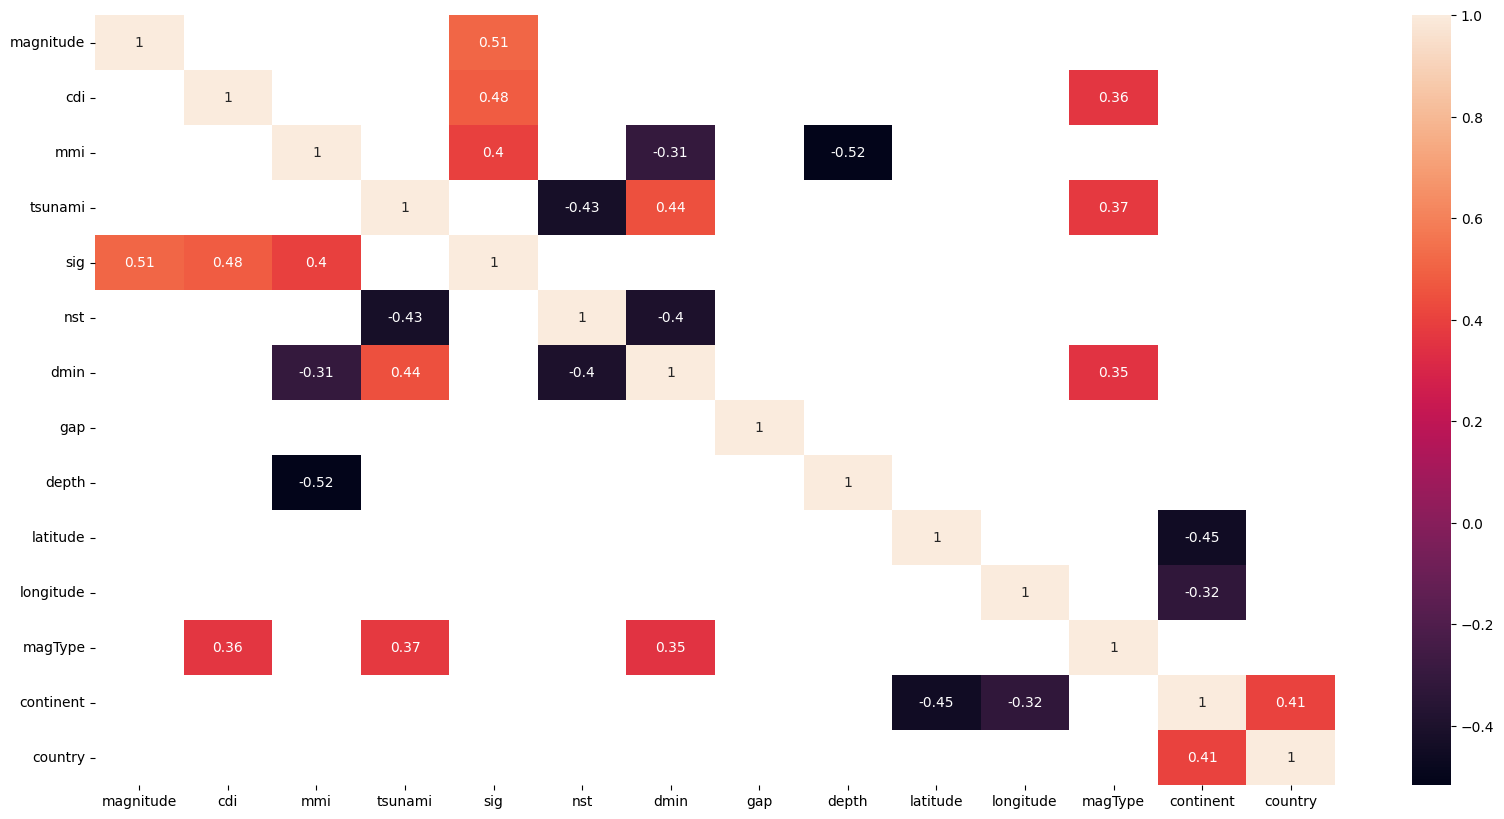

In [ ]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
print(d)
sns.heatmap(d,annot=True)

# Scaling and model building

In [ ]:
# Same model setting from the baseline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import xgboost as xgb
import logging


In [ ]:
# Prepocess dataset obtain tree and test dataset.
sc = StandardScaler()

x=df.drop('tsunami',axis=1)
y=df['tsunami']
x_scaled=sc.fit_transform(x)
x=pd.DataFrame(x_scaled,columns=x.columns)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

<Axes: xlabel='tsunami', ylabel='count'>

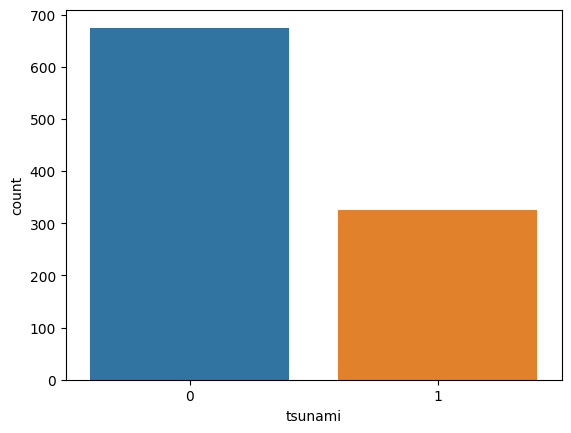

In [ ]:
sns.countplot(x=y,data=df)

# Handling data imbalance

In [ ]:
sm=SMOTE()
x_train_res,y_train_res=sm.fit_resample(x_train,y_train)

In [ ]:
x_train_res.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,magType,continent,country
0,-0.320029,-1.083459,-0.018838,-0.453884,-0.811623,-0.543004,-0.857505,-0.419990,0.893255,0.669918,-1.991441,0.560802,1.039159
1,-0.776724,0.118715,-0.716542,-0.569912,-0.811623,-0.287711,0.003020,-0.471234,-0.969882,0.997376,0.702122,1.227857,1.039159
2,-0.091682,-0.482372,-2.111950,-0.380953,-0.811623,2.358362,-0.078934,2.599578,-1.035870,-1.961263,0.702122,1.227857,1.039159
3,-1.005072,0.719801,0.678866,-0.649474,-0.811623,1.772008,-0.447731,-0.501828,-0.764352,0.993501,0.702122,0.370215,0.921427
4,-0.776724,-1.083459,-1.414246,-0.589803,-0.811623,2.364153,0.371817,0.813688,-0.770626,0.992266,0.702122,0.370215,0.921427


In [ ]:
y_train_res.head()

0    0
1    1
2    1
3    1
4    1
Name: tsunami, dtype: int64

In [ ]:
# Tree Models
models = {
    "Tree ":DecisionTreeClassifier(),
    "Ensambled":RandomForestClassifier(),
    "xg":xgb.XGBClassifier()
}

In [ ]:
for name,model in models.items():
    model.fit(x_train_res,y_train_res)
    p = model.predict(x_test)
    print("Model: " , name)
    print("------------------------------")
    print(classification_report(y_test,p))
    print(".........................................................|")

Model:  Tree 
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       133
           1       0.84      0.88      0.86        67

    accuracy                           0.91       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.91      0.91      0.91       200

.........................................................|
Model:  Ensambled
------------------------------
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       133
           1       0.89      0.87      0.88        67

    accuracy                           0.92       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200

.........................................................|
Model:  xg
------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92    

# Grid Search: Hyperparameter

In [ ]:
#XG

In [ ]:
# Model: XG boosted tree
model_xg=xgb.XGBClassifier()
params = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'max_depth': [3, 5, 7]
        }
grid_xg= GridSearchCV(model_xg, params, cv=5)
grid_xg.fit(x_train_res,y_train_res)
print(grid_xg.best_params_)
print(grid_xg.best_score_)

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
0.9483444273766853


              precision    recall  f1-score   support

           0       0.95      0.91      0.93       133
           1       0.84      0.91      0.87        67

    accuracy                           0.91       200
   macro avg       0.89      0.91      0.90       200
weighted avg       0.91      0.91      0.91       200

Axes(0.125,0.11;0.62x0.77)


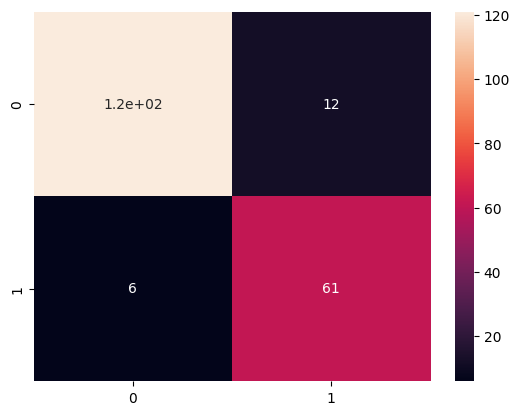

In [ ]:
# Result of XG
p_xg = grid_xg.predict(x_test)
print(classification_report(y_test,p_xg))
print(sns.heatmap(confusion_matrix(y_test,p_xg),annot=True))

In [ ]:
# Random forest

In [ ]:
# Model Random forest
model_rf=RandomForestClassifier()
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_rf= GridSearchCV(model_rf, params, cv=5)
grid_rf.fit(x_train_res,y_train_res)
print(grid_rf.best_params_)
print(grid_rf.best_score_)

{'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
0.9326719576719578


              precision    recall  f1-score   support

           0       0.95      0.92      0.94       133
           1       0.86      0.90      0.88        67

    accuracy                           0.92       200
   macro avg       0.90      0.91      0.91       200
weighted avg       0.92      0.92      0.92       200

Axes(0.125,0.11;0.62x0.77)


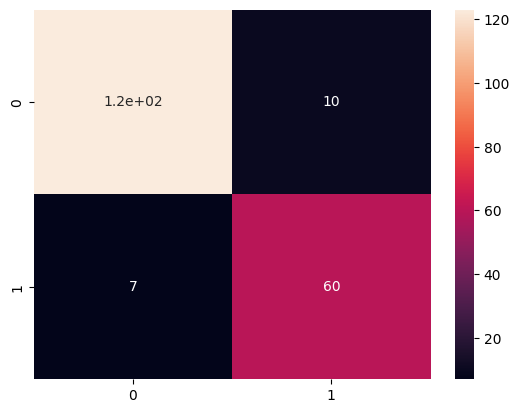

In [ ]:
# Results of Random forest
p_rf = grid_rf.predict(x_test)
print(classification_report(y_test,p_rf))
print(sns.heatmap(confusion_matrix(y_test,p_rf),annot=True))

# Try out nested cross vlidation technique to manupilate with the result

In [ ]:
# Define the outer loop - 5-fold cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = xgb.XGBClassifier ()

    # Define search space for hyperparameters
    params = {'learning_rate': [0.01, 0.1, 0.2, 0.3], 'n_estimators': [100, 200, 300], 'max_depth': [3, 4, 5]}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  0.91875


In [65]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store results of cross-validation
outer_scores = []

# Outer loop for cross-validation
for train_idx, test_idx in outer_cv.split(x_train, y_train):
    # Split data
    X_tr, X_te = x_train.iloc[train_idx], x_train.iloc[test_idx]
    y_tr, y_te = y_train.iloc[train_idx], y_train.iloc[test_idx]

    # Define the inner loop - 3-fold cross-validation
    inner_cv = KFold(n_splits=3, shuffle=True, random_state=42)

    # Define the model
    model = RandomForestClassifier()

    # Define search space for hyperparameters
    params = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10],
              'max_features': ['sqrt', 'log2']}

    # Set up GridSearchCV
    grid_search = GridSearchCV(model, params, cv=inner_cv, scoring='accuracy')

    # Fit model on training set
    grid_search.fit(X_tr, y_tr)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the best model on the testing set
    score = best_model.score(X_te, y_te)

    # Append to the scores list
    outer_scores.append(score)

# Print the mean of outer_scores
print('Cross-validation accuracy: ', np.mean(outer_scores))

Cross-validation accuracy:  0.91375


# Analysis on the results

# Incoprate with JP dataset. Test on exsting models

In [ ]:
df_jp = pd.read_csv('japan_tsunami.csv')

## Drop unecessary columns and convert time into year and month.
df_jp.drop(['alert'],axis=1,inplace=True)
df_jp.drop('date_time',axis=1,inplace=True)
obj_jp=df_jp.select_dtypes(include=['object'])
obj_jp

## This time we kept the magtype, continent and country.
## Explaination will be provided later by zihan
obj_jp.drop('net',axis=1,inplace=True)
df_jp.drop(['net','country', 'continent','magType'],axis=1,inplace=True)

## convert categorical variables to numerical labels since tree model need numercial values
from sklearn.preprocessing import LabelEncoder
lr_jp=LabelEncoder()
obj_lbl_jp=obj_jp.apply(lr.fit_transform)
df_jp=pd.concat([df_jp,obj_lbl_jp],axis=1)

## prepare testing dataset
sc_jp = StandardScaler()
x_jp=df_jp.drop('tsunami',axis=1)
y_jp=df_jp['tsunami']
x_scaled_jp=sc_jp.fit_transform(x_jp)
x_jp=pd.DataFrame(x_scaled_jp,columns=x_jp.columns)
x_train_res_jp,y_train_res_jp=sm.fit_resample(x_jp,y_jp)

In [ ]:
print(x_jp)
print(x_train_res_jp)

     magnitude       cdi       mmi       sig  nst  dmin  gap     depth  \
0     1.803029  0.919808  1.364691  1.805035  0.0   0.0  0.0 -0.751456   
1    -0.815780  0.919808  0.916902 -0.815128  0.0   0.0  0.0 -0.742255   
2     1.312003  0.919808  0.916902  1.310514  0.0   0.0  0.0 -0.751456   
3     1.475678  2.263961  2.260270  1.474025  0.0   0.0  0.0 -0.750487   
4     0.493625 -0.872396 -0.426466  0.492959  0.0   0.0  0.0 -0.762593   
..         ...       ...       ...       ...  ...   ...  ...       ...   
184  -1.306807 -0.424345 -0.874255 -1.305661  0.0   0.0  0.0  0.687725   
185  -0.488429 -0.872396 -0.426466 -0.488106  0.0   0.0  0.0  0.201541   
186  -0.815780 -0.424345 -0.426466 -0.815128  0.0   0.0  0.0  0.465456   
187  -0.161078  0.919808  1.364691 -0.161084  0.0   0.0  0.0 -0.089975   
188   0.329949 -0.872396 -0.874255  0.329448  0.0   0.0  0.0 -0.751456   

     latitude  longitude  magType  continent  country  
0   -2.114600   0.701040      0.0        0.0      0.0  

              precision    recall  f1-score   support

           0       0.50      0.88      0.64       128
           1       0.52      0.12      0.20       128

    accuracy                           0.50       256
   macro avg       0.51      0.50      0.42       256
weighted avg       0.51      0.50      0.42       256

Axes(0.125,0.11;0.62x0.77)


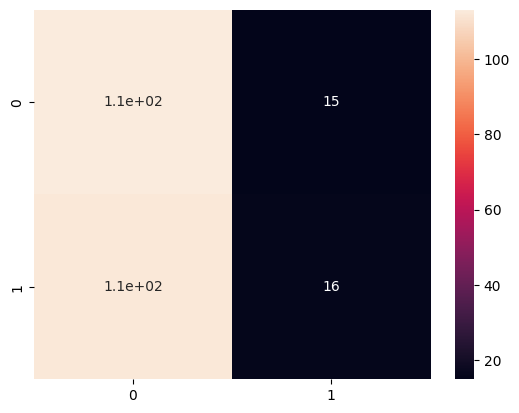

In [ ]:
# Result of XG
p_xg_jp = grid_xg.predict(x_train_res_jp)
print(classification_report(y_train_res_jp,p_xg_jp))
print(sns.heatmap(confusion_matrix(y_train_res_jp,p_xg_jp),annot=True))

In [ ]:
x_train_res_jp

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,magType,continent,country
0,1.803029,0.919808,1.364691,1.805035,0.0,0.0,0.0,-0.751456,-2.114600,0.701040,0.0,0.0,0.0
1,-0.815780,0.919808,0.916902,-0.815128,0.0,0.0,0.0,-0.742255,0.303644,0.296948,0.0,0.0,0.0
2,1.312003,0.919808,0.916902,1.310514,0.0,0.0,0.0,-0.751456,1.564572,0.627637,0.0,0.0,0.0
3,1.475678,2.263961,2.260270,1.474025,0.0,0.0,0.0,-0.750487,-0.211694,0.012256,0.0,0.0,0.0
4,0.493625,-0.872396,-0.426466,0.492959,0.0,0.0,0.0,-0.762593,-1.576727,0.285025,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,0.029757,0.994154,1.290390,0.029558,0.0,0.0,0.0,0.011295,0.639635,0.244818,0.0,0.0,0.0
252,1.942053,2.196477,1.879925,1.943918,0.0,0.0,0.0,1.088530,0.888158,0.351904,0.0,0.0,0.0
253,0.642762,1.163732,0.916902,0.641947,0.0,0.0,0.0,-0.745172,0.630337,0.323748,0.0,0.0,0.0
254,0.820976,0.919808,0.916902,0.819981,0.0,0.0,0.0,-0.516576,0.362157,0.181160,0.0,0.0,0.0


In [ ]:
y_train_res_jp

0      1
1      1
2      1
3      1
4      0
      ..
251    1
252    1
253    1
254    1
255    1
Name: tsunami, Length: 256, dtype: int64

In [ ]:
# Indonesia

In [ ]:
df = pd.read_csv('earthquake_1995-2023_fixed.csv')
# Filter the dataset to only include rows where 'country' is 'Japan' (for example)
df_i = df.loc[df['country'] == 'Indonesia']

## Drop unecessary columns and convert time into year and month.
df_i.drop(['alert','title','location'],axis=1,inplace=True)
df_i['date_time']=pd.to_datetime(df_i['date_time'])
df_i['Year']=pd.DatetimeIndex(df_i["date_time"]).year
df_i['Month']=pd.DatetimeIndex(df_i["date_time"]).month
df_i.drop('date_time',axis=1,inplace=True)

## we will drop the year and month, since the tsunami is not a seasonale staff. It can occurs anytime.
df_i.drop(['Year', 'Month'], axis=1,inplace=True)#we have latitude and longitude

obj_i=df_i.select_dtypes(include=['object'])
obj_i
## This time we kept the magtype, continent and country.
## Explaination will be provided later by zihan
obj_i.drop('net',axis=1,inplace=True)
df_i.drop(['net','country', 'continent','magType'],axis=1,inplace=True)

## convert categorical variables to numerical labels since tree model need numercial values
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
obj_lbl_i=obj_i.apply(lr.fit_transform)
df_i=pd.concat([df_i,obj_lbl_i],axis=1)

x_i=df_i.drop('tsunami',axis=1)
y_i=df_i['tsunami']
x_scaled_i=sc.fit_transform(x_i)
x_i=pd.DataFrame(x_scaled_i,columns=x_i.columns)
x_train_i,x_test_i,y_train_i,y_test_i=train_test_split(x_i,y_i,test_size=0.2)
sm=SMOTE()
x_train_i,y_train_i=sm.fit_resample(x_train_i,y_train_i)


              precision    recall  f1-score   support

           0       0.84      0.71      0.77       104
           1       0.75      0.87      0.80       104

    accuracy                           0.79       208
   macro avg       0.80      0.79      0.79       208
weighted avg       0.80      0.79      0.79       208

Axes(0.125,0.11;0.62x0.77)


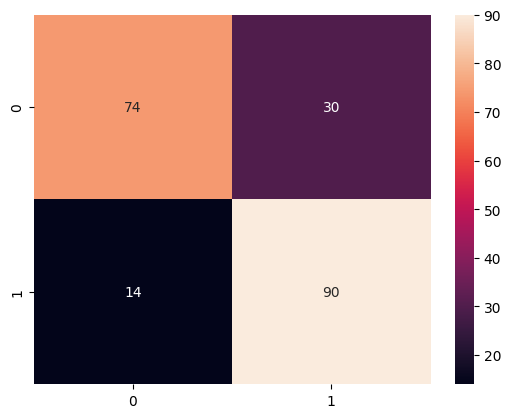

In [ ]:
p_xg_i = grid_xg.predict(x_train_i)
print(classification_report(y_train_i,p_xg_i))
print(sns.heatmap(confusion_matrix(y_train_i,p_xg_i),annot=True))

In [ ]:
import logging

# Initialize logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Log the start of the prediction process
logging.info("Starting individual predictions and analysis...")

correct_predictions = 0
total_predictions = 0

# Loop through each row in the input data and make a prediction
for i in range(len(x_train_i)):
    single_input = x_train_i.iloc[i:i+1, :]  # Get the i-th row
    actual_output = y_train_i.iloc[i]  # Get the actual label

    # Predict
    single_output = grid_xg.predict(single_input)[0]

    # Check if the prediction is correct
    is_correct = "Correct" if single_output == actual_output else "Incorrect"

    if is_correct == "Correct":
        correct_predictions += 1

    total_predictions += 1

    # Log the input features, prediction, and whether it was correct
    logging.info(f"Input features: {single_input.values}, Prediction: {single_output}, Actual: {actual_output}, {is_correct}")

# Log the end of the prediction process
logging.info("Completed individual predictions.")

# Log summary statistics
logging.info(f"Total predictions: {total_predictions}, Correct predictions: {correct_predictions}, Accuracy: {correct_predictions / total_predictions:.2f}")


## Analysis Result again

In [ ]:
print(df_i)

     magnitude  cdi  mmi  tsunami  sig  nst   dmin   gap    depth  latitude  \
13         7.1    9    7        0  838   70  2.282  58.0   15.462   -0.7810   
16         7.0    5    3        0  818  131  1.881  31.0  594.028   -6.0255   
31         7.0    3    5        1  756  130  1.974  17.0   28.566    2.7401   
32         7.6    5    7        0  957  114  1.575  21.0  105.249   -7.0852   
61         6.7    9    6        0  708    0  2.188  43.0   28.000   -0.6831   
..         ...  ...  ...      ...  ...  ...    ...   ...      ...       ...   
970        7.9    0    8        0  960    0  0.000   0.0   24.000    0.7290   
971        7.1    0    6        0  776    0  0.000   0.0  141.900   -6.9030   
972        6.5    0    6        0  650    0  0.000   0.0   63.400   -3.7030   
980        6.8    0    7        0  711    0  0.000   0.0   33.000   -2.0450   
997        6.9    0    6        0  732    0  0.000   0.0   11.200   -8.3780   

     longitude  magType  continent  country  
13   

## Improve on the model